<a href="https://colab.research.google.com/github/british2002/Deep-Learning/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%86%D0%B5%D0%BD%D1%8B_%D0%B0%D0%BA%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Установка

In [ ]:
#установим пакет Мосбиржи
!pip install moexalgo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
#установим пакет Darts
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.0/340.0 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8

# 1. Подготовка данных

In [ ]:
#импортируем библиотеки и методы для работы
import numpy as np
import pandas as pd
import os

from moexalgo import Ticker, Market
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

import darts
from darts import TimeSeries
from darts.metrics import mae, rmse, mape, smape, r2_score



import warnings
warnings.filterwarnings('ignore')

from darts.models import NaiveMean
from darts.models import AutoARIMA
from darts.models import ExponentialSmoothing
from darts.models import RandomForestModel
from darts.models import LightGBMModel
from darts.models import XGBModel
from darts.models import CatBoostModel
from darts.models import RNNModel

In [ ]:
#для информации загрузим список акций Мосбиржи
stocks = Market("shares")
all_stocks = pd.DataFrame(stocks.tickers())
all_stocks

,ticker,shortname,lotsize,decimals,minstep,issuesize,isin,regnumber,listlevel
0,ABIO,iАРТГЕН ао,10,2,0.020,92645451,RU000A0JNAB6,1-01-08902-A,2
1,ABRD,АбрауДюрсо,10,1,0.200,98000184,RU000A0JS5T7,1-02-12500-A,3
2,AFKS,Система ао,100,3,0.001,9650000000,RU000A0DQZE3,1-05-01669-A,1
3,AFLT,Аэрофлот,10,2,0.010,3975771215,RU0009062285,1-01-00010-A,1
4,AGRO,AGRO-гдр,1,1,0.200,0,US7496552057,None,3
...,...,...,...,...,...,...,...,...,...
254,YRSB,ТНСэнЯр,10,0,2.000,17143584,RU000A0D8760,1-01-50099-A,3
255,YRSBP,ТНСэнЯр-п,10,1,0.500,4507320,RU000A0D88B3,2-01-50099-A,3
256,ZAYM,Займер ао,10,2,0.050,100000000,RU000A107RM8,1-01-16767-A,3
257,ZILL,ЗИЛ ао,1,0,5.000,2659962,RU0009086193,1-02-00036-A,3


In [ ]:
def load_stock_data(stock_symbol, start_date, end_date):
    # код для загрузки котировок по заданным параметрам
    # Возвращаем DataFrame

    df = Ticker(stock_symbol).candles(start=start_date, end=end_date, period='1d')
    print(stock_symbol,
          ' - Загружаем с', start_date.strftime('%Y-%m-%d'), 'по', end_date.strftime('%Y-%m-%d'),
          ". Загружено с", df['begin'].min().strftime('%Y-%m-%d'), 'по', df['begin'].max().strftime('%Y-%m-%d'), '.')
    return df


In [ ]:
def update_stock_data(stock_symbol):
    # Определяем имя файла для акции
    filename = f"{stock_symbol}.csv"
    old_filename = f"/kaggle/input/moexalgo-data/{filename}"
    # old_filename = filename

    # Проверяем наличие файла
    if os.path.exists(old_filename):
        try:
            # Загружаем ранее сохраненные данные
            stock_data = pd.read_csv(old_filename)

            # Определяем последнюю загруженную дату
            last_date = pd.to_datetime(stock_data['begin'].max())

            # Если last_date в текущем дне, прекращаем выполнение функции
            if last_date.date() == datetime.now().date():
                shutil.copy(old_filename, filename)
                return

            # Загружаем новые данные начиная с последней даты
            new_data = load_stock_data(stock_symbol, last_date, datetime.now())

            # Фильтруем существующие данные по дате
            existing_data_filtered = stock_data[pd.to_datetime(stock_data['begin']) < new_data['begin'].min()]

            # Обновляем существующие данные
            stock_data = pd.concat([existing_data_filtered, new_data], ignore_index=True)
        except Exception as e:
            stock_data = load_stock_data(stock_symbol, datetime(2000, 1, 1), datetime.now())

    else:
        # Если файл не существует, загружаем все данные
        stock_data = load_stock_data(stock_symbol, datetime(2000, 1, 1), datetime.now())

    # Сохраняем данные на диск
    stock_data.to_csv(filename, index=False)

# Пример использования
# stock_symbol = 'AFKS'  # Замените на символ интересующей вас акции
# update_stock_data(stock_symbol)

In [ ]:
#нас интересуют акции АО Газпром
stock_symbol = 'GAZP'
update_stock_data(stock_symbol)

GAZP  - Загружаем с 2000-01-01 по 2025-08-11 . Загружено с 2014-06-09 по 2025-08-11 .


In [ ]:
filename = stock_symbol+'.csv'
df = pd.read_csv(filename, parse_dates=True)
df.head(10)

,open,close,high,low,value,volume,begin,end
0,144.00,144.40,146.20,143.03,5.851239e+09,40347300.0,2014-06-09,2014-06-09 23:59:59
1,144.31,144.75,144.76,142.67,5.956067e+09,41460990.0,2014-06-10,2014-06-10 23:59:59
2,145.20,146.40,146.40,143.90,5.725373e+09,39418520.0,2014-06-11,2014-06-11 23:59:59
3,144.00,145.20,145.27,142.58,1.113453e+10,77165360.0,2014-06-16,2014-06-16 23:59:59
4,145.30,144.77,146.37,143.72,6.436430e+09,44370530.0,2014-06-17,2014-06-17 23:59:59
5,144.79,145.00,146.19,144.43,4.832640e+09,33270240.0,2014-06-18,2014-06-18 23:59:59
6,146.40,145.20,147.69,145.04,6.552395e+09,44670940.0,2014-06-19,2014-06-19 23:59:59
7,145.05,145.60,145.88,144.28,4.907721e+09,33779020.0,2014-06-20,2014-06-20 23:59:59
8,146.20,147.17,147.27,145.07,4.963199e+09,33923270.0,2014-06-23,2014-06-23 23:59:59
9,147.65,153.25,153.42,147.56,1.320014e+10,87546740.0,2014-06-24,2014-06-24 23:59:59


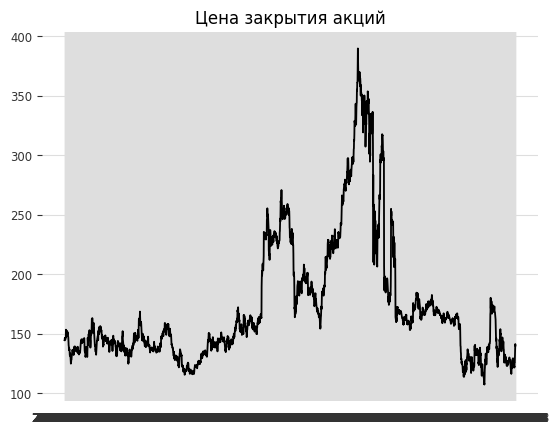

In [ ]:
# Используем только столбец 'Close' (цена закрытия)
close_prices = df['close'].values
dates = df['begin'].values

plt.plot(dates, close_prices)
plt.title('Цена закрытия акций')
plt.show()

In [ ]:
#создадим временной ряд с частотой "ежедневно"
series = TimeSeries.from_dataframe(df, time_col='begin', value_cols='close', freq ='d')

In [ ]:
#проверим и заменим NaN на предыдущее значения
def replace_nan_with_forward_fill(series):

    values = series.values().flatten()
    times = series.time_index
    freq = series.freq

    #определим число NaN значений
    nans = np.isnan(values).sum()
    print(f"NaN значений: {nans}")
    #используем forward fill
    values_filled = pd.Series(values).fillna(method='ffill').values

    #если остались NaN в начале, используем backward fill
    if np.isnan(values_filled[0]):
        values_filled = pd.Series(values_filled).fillna(method='bfill').values

    print(f"Заменено {nans} значений")

    # Создаем новый TimeSeries с freq
    new_series = TimeSeries.from_times_and_values(
        times,
        values_filled,
        freq=freq
    )

    print(f"Новая длина: {len(new_series)}")
    return new_series

In [ ]:
data = replace_nan_with_forward_fill(series)

NaN значений: 1242
Заменено 1242 значений
Новая длина: 4082


# 2. NaiveMean


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 100
tscv = TimeSeriesSplit(n_splits)

In [ ]:
X, y = data.values().flatten(), data.time_index

In [ ]:
#обучим и валидируем модель на основе NaiveMean
fold_results = []

sum_mae_score_train = 0
sum_mae_score_test = 0
sum_rmse_score = 0
sum_mape_score = 0
sum_smape_score = 0
sum_r2_score = 0
for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"\n--- Фолд {fold + 1} ---")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_values = X[train_index]
    test_values = X[test_index]
    train_times = y[train_index]
    test_times = y[test_index]

    #cоздаем TimeSeries
    train_series = TimeSeries.from_times_and_values(train_times, train_values, freq=series.freq)
    test_series = TimeSeries.from_times_and_values(test_times, test_values, freq=series.freq)

    print(f"Обучающая выборка: {len(train_series)} наблюдений")
    print(f"Тестовая выборка: {len(test_series)} наблюдений")


   #cоздаем и обучаем модель
    model = NaiveMean()
    model.fit(train_series)  # Простое обучение

   #делаем предсказания
    predictions = model.predict(len(test_series))

   #считаем MAE
    mae_score_train = mae(train_times, train_values)
    sum_mae_score_train += mae_score_train
    mae_score_test = mae(test_series, predictions)
    sum_mae_score_test += mae_score_test

    #считаем RMSE
    rmse_score = rmse(test_series, predictions)
    sum_rmse_score += rmse_score

    #считаем MAPE
    mape_score = mape(test_series, predictions)
    sum_mape_score += mape_score

    #считаем SMAPE
    smape_score = smape(test_series, predictions)
    sum_smape_score += smape_score

    #считаем R2
    r2_value = r2_score(test_series, predictions)
    sum_r2_score += r2_value

    # Сохраняем результаты
    fold_results.append({
        'fold': fold + 1,
        'MAE_train': mae_score_train,
        'MAE_test': mae_score_test,
        'RMSE': rmse_score,
        'MAPE': mape_score,
        'SMAPE': smape_score,
        'R2': r2_value,
        'predictions': predictions,
        'actual': test_series,
        'model': model  # Сохраняем модель для анализа
    })

    print(f"Метрики: MAE={mae_score_train:.6f}, RMSE={rmse_score:.6f}, MAPE={mape_score:.4f}%, SMAPE={smape_score:.4f}%, R2={r2_value:.2f}")


print(f"\nОбучение завершено! Успешных фолдов: {len(fold_results)}")
print(f'\n==ИТОГОВЫЕ РЕЗУЛЬТАТЫ== ')
print(f'MAE: {sum_mae_score_train/(len(fold_results)):.2f}')
print(f'RMSE: {sum_rmse_score/(len(fold_results)):.2f}')
print(f'MAPE: {sum_mape_score/(len(fold_results)):.2f}%')
print(f'SMAPE: {sum_smape_score/(len(fold_results)):.2f}%')
print(f'R2: {sum_r2_score/(len(fold_results)):.2f}')


ERROR:darts.utils.ts_utils:ValueError: input series must be of type `TimeSeries`, `Sequence[TimeSeries]`, or `Sequence[Sequence[TimeSeries]]`. Raised: `TypeError(''Timestamp' object is not subscriptable')`



--- Фолд 1 ---
Обучающая выборка: 82 наблюдений
Тестовая выборка: 40 наблюдений


ValueError: input series must be of type `TimeSeries`, `Sequence[TimeSeries]`, or `Sequence[Sequence[TimeSeries]]`. Raised: `TypeError(''Timestamp' object is not subscriptable')`

In [ ]:
predictions.mean()

<TimeSeries (begin: 65, component: 1, sample: 1)> Size: 520B
array([[[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

...

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]],

       [[154.0537856]]])
Coordinates:
  * begin      (begin) datetime64[ns] 520B 2025-06-05 2025-06-06 ... 2025-08-08
  * component  (component) object 8B '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

# 3. AutoARIMA

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 100
tscv = TimeSeriesSplit(n_splits)

In [ ]:
#обучим и валидируем модель на основе AutoARIMA

fold_results = []
sum_mae_score = 0
sum_rmse_score = 0
sum_mape_score = 0
sum_smape_score = 0



for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"\nФолд {fold + 1}:")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_values = X[train_index]
    test_values = X[test_index]
    train_times = y[train_index]
    test_times = y[test_index]



    # Создаем TimeSeries
    train_series = TimeSeries.from_times_and_values(train_times, train_values, freq=series.freq)
    test_series = TimeSeries.from_times_and_values(test_times, test_values, freq=series.freq)

    print(f"Обучающая выборка: {len(train_series)} наблюдений")
    print(f"Тестовая выборка: {len(test_series)} наблюдений")


    #cоздаем и обучаем модель
    model = AutoARIMA(start_p=1, start_q=1, max_p=3, max_q=3, max_d=2, stepwise=True)
    model.fit(train_series)  # Простое обучение

   #делаем предсказания
    predictions = model.predict(len(test_series))

   #считаем MAE
    mae_score = mae(test_series, predictions)
    sum_mae_score += mae_score

    #считаем RMSE
    rmse_score = rmse(test_series, predictions)
    sum_rmse_score += rmse_score

    #считаем MAPE
    mape_score = mape(test_series, predictions)
    sum_mape_score += mape_score

    #считаем SMAPE
    smape_score = smape(test_series, predictions)
    sum_smape_score += smape_score

    #считаем R2
    r2_value = r2_score(test_series, predictions)
    sum_r2_score += r2_value

    # Сохраняем результаты
    fold_results.append({
        'fold': fold + 1,
        'MAE': mae_score,
        'RMSE': rmse_score,
        'MAPE': mape_score,
        'SMAPE': smape_score,
        'R2': r2_value,
        'predictions': predictions,
        'actual': test_series,
        'model': model  # Сохраняем модель для анализа
    })

    print(f"Метрики: MAE={mae_score:.6f}, RMSE={rmse_score:.6f}, MAPE={mape_score:.4f}%, SMAPE={smape_score:.4f}%, R2={r2_value:.2f}")


print(f"\nОбучение завершено! Успешных фолдов: {len(fold_results)}")
print(f'\n==ИТОГОВЫЕ РЕЗУЛЬТАТЫ== ')
print(f'MAE: {sum_mae_score/(len(fold_results)):.2f}')
print(f'RMSE: {sum_rmse_score/(len(fold_results)):.2f}')
print(f'MAPE: {sum_mape_score/(len(fold_results)):.2f}')
print(f'SMAPE: {sum_smape_score/(len(fold_results)):.2f}')
print(f'R2: {sum_r2_score/(len(fold_results)):.2f}')


Фолд 1:
Обучающая выборка: 78 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=1.702750, RMSE=2.090674, MAPE=1.2509%, SMAPE=1.2509%, R2=-0.03

Фолд 2:
Обучающая выборка: 118 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=3.739750, RMSE=4.777132, MAPE=2.6551%, SMAPE=2.7030%, R2=-0.23

Фолд 3:
Обучающая выборка: 158 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=3.948750, RMSE=4.955797, MAPE=2.8839%, SMAPE=2.8321%, R2=-0.14

Фолд 4:
Обучающая выборка: 198 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=9.383500, RMSE=11.211880, MAPE=6.4153%, SMAPE=6.7078%, R2=-1.32

Фолд 5:
Обучающая выборка: 238 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=9.832250, RMSE=11.091592, MAPE=6.3069%, SMAPE=6.5591%, R2=-2.23

Фолд 6:
Обучающая выборка: 278 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=5.474750, RMSE=6.289576, MAPE=3.8059%, SMAPE=3.8307%, R2=-0.04

Фолд 7:
Обучающая выборка: 318 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=3.770

In [ ]:
predictions.mean()

<TimeSeries (begin: 40, component: 1, sample: 1)> Size: 320B
array([[[127.46671496]],

       [[127.49371149]],

       [[127.48768463]],

       [[127.47460955]],

       [[127.48141444]],

       [[127.48623151]],

       [[127.48129343]],

       [[127.48021558]],

       [[127.48309722]],

       [[127.48282404]],

...

       [[127.48211878]],

       [[127.48211722]],

       [[127.48211729]],

       [[127.48211808]],

       [[127.48211782]],

       [[127.48211748]],

       [[127.48211772]],

       [[127.48211782]],

       [[127.48211767]],

       [[127.48211766]]])
Coordinates:
  * begin      (begin) datetime64[ns] 320B 2025-06-29 2025-06-30 ... 2025-08-07
  * component  (component) object 8B '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

# 4. Exponential Smoothing

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 100
tscv = TimeSeriesSplit(n_splits)

In [ ]:
#обучим и валидируем модель на основе AutoARIMA

fold_results = []
sum_mae_score = 0
sum_rmse_score = 0
sum_mape_score = 0
sum_smape_score = 0


# Создаем и обучаем модель Exponential Smoothing
# Параметры:
# - seasonal_periods: период сезонности (None для несезонной модели)
# - seasonal: тип сезонности ('additive', 'multiplicative', None)
# - damped: использовать затухающий тренд (True/False)




for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"\nФолд {fold + 1}:")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_values = X[train_index]
    test_values = X[test_index]
    train_times = y[train_index]
    test_times = y[test_index]



    # Создаем TimeSeries
    train_series = TimeSeries.from_times_and_values(train_times, train_values, freq=series.freq)
    test_series = TimeSeries.from_times_and_values(test_times, test_values, freq=series.freq)

    print(f"Обучающая выборка: {len(train_series)} наблюдений")
    print(f"Тестовая выборка: {len(test_series)} наблюдений")


    #cоздаем и обучаем модель
    model = ExponentialSmoothing(seasonal_periods=None, seasonal=None, damped=False)
    model.fit(train_series)  # Простое обучение

   #делаем предсказания
    predictions = model.predict(len(test_series))

   #считаем MAE
    mae_score = mae(test_series, predictions)
    sum_mae_score += mae_score

    #считаем RMSE
    rmse_score = rmse(test_series, predictions)
    sum_rmse_score += rmse_score

    #считаем MAPE
    mape_score = mape(test_series, predictions)
    sum_mape_score += mape_score

    #считаем SMAPE
    smape_score = smape(test_series, predictions)
    sum_smape_score += smape_score

    #считаем R2
    r2_value = r2_score(test_series, predictions)
    sum_r2_score += r2_value

    # Сохраняем результаты
    fold_results.append({
        'fold': fold + 1,
        'MAE': mae_score,
        'RMSE': rmse_score,
        'MAPE': mape_score,
        'SMAPE': smape_score,
        'R2': r2_value,
        'predictions': predictions,
        'actual': test_series,
        'model': model  # Сохраняем модель для анализа
    })

    print(f"Метрики: MAE={mae_score:.6f}, RMSE={rmse_score:.6f}, MAPE={mape_score:.4f}%, SMAPE={smape_score:.4f}%, R2={r2_value:.2f}")


print(f"\nОбучение завершено! Успешных фолдов: {len(fold_results)}")
print(f'\n==ИТОГОВЫЕ РЕЗУЛЬТАТЫ== ')
print(f'MAE: {sum_mae_score/(len(fold_results)):.2f}')
print(f'RMSE: {sum_rmse_score/(len(fold_results)):.2f}')
print(f'MAPE: {sum_mape_score/(len(fold_results)):.2f}')
print(f'SMAPE: {sum_smape_score/(len(fold_results)):.2f}')
print(f'R2: {sum_r2_score/(len(fold_results)):.2f}')


Фолд 1:
Обучающая выборка: 78 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=3.505466, RMSE=3.693118, MAPE=2.5632%, SMAPE=2.5920%, R2=-2.21

Фолд 2:
Обучающая выборка: 118 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=4.291335, RMSE=6.153564, MAPE=3.0212%, SMAPE=3.1136%, R2=-1.04

Фолд 3:
Обучающая выборка: 158 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=3.802604, RMSE=4.724633, MAPE=2.7728%, SMAPE=2.7289%, R2=-0.04

Фолд 4:
Обучающая выборка: 198 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=10.369010, RMSE=12.429280, MAPE=7.0828%, SMAPE=7.4491%, R2=-1.85

Фолд 5:
Обучающая выборка: 238 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=9.877325, RMSE=11.134208, MAPE=6.3361%, SMAPE=6.5904%, R2=-2.25

Фолд 6:
Обучающая выборка: 278 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=5.588325, RMSE=6.418575, MAPE=3.8801%, SMAPE=3.9108%, R2=-0.08

Фолд 7:
Обучающая выборка: 318 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=3.83

In [ ]:
predictions.mean()

<TimeSeries (begin: 40, component: 1, sample: 1)> Size: 320B
array([[[127.47860254]],

       [[127.47441645]],

       [[127.47023036]],

       [[127.46604427]],

       [[127.46185818]],

       [[127.45767209]],

       [[127.453486  ]],

       [[127.44929991]],

       [[127.44511382]],

       [[127.44092773]],

...

       [[127.35301986]],

       [[127.34883377]],

       [[127.34464768]],

       [[127.34046159]],

       [[127.3362755 ]],

       [[127.33208942]],

       [[127.32790333]],

       [[127.32371724]],

       [[127.31953115]],

       [[127.31534506]]])
Coordinates:
  * begin      (begin) datetime64[ns] 320B 2025-06-29 2025-06-30 ... 2025-08-07
  * component  (component) object 8B '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

# 5. Random Forest

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 100
tscv = TimeSeriesSplit(n_splits)

In [ ]:
#обучим и валидируем модель на основе AutoARIMA

fold_results = []
sum_mae_score = 0
sum_rmse_score = 0
sum_mape_score = 0
sum_smape_score = 0


# Создаем и обучаем модель Exponential Smoothing
# Параметры:
# - seasonal_periods: период сезонности (None для несезонной модели)
# - seasonal: тип сезонности ('additive', 'multiplicative', None)
# - damped: использовать затухающий тренд (True/False)




for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"\nФолд {fold + 1}:")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_values = X[train_index]
    test_values = X[test_index]
    train_times = y[train_index]
    test_times = y[test_index]



    # Создаем TimeSeries
    train_series = TimeSeries.from_times_and_values(train_times, train_values, freq=series.freq)
    test_series = TimeSeries.from_times_and_values(test_times, test_values, freq=series.freq)

    print(f"Обучающая выборка: {len(train_series)} наблюдений")
    print(f"Тестовая выборка: {len(test_series)} наблюдений")


    #cоздаем и обучаем модель
    model = RandomForestModel(lags=5, n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
    model.fit(train_series)

   #делаем предсказания
    predictions = model.predict(len(test_series))

   #считаем MAE
    mae_score = mae(test_series, predictions)
    sum_mae_score += mae_score

    #считаем RMSE
    rmse_score = rmse(test_series, predictions)
    sum_rmse_score += rmse_score

    #считаем MAPE
    mape_score = mape(test_series, predictions)
    sum_mape_score += mape_score

    #считаем SMAPE
    smape_score = smape(test_series, predictions)
    sum_smape_score += smape_score

    #считаем R2
    r2_value = r2_score(test_series, predictions)
    sum_r2_score += r2_value

    # Сохраняем результаты
    fold_results.append({
        'fold': fold + 1,
        'MAE': mae_score,
        'RMSE': rmse_score,
        'MAPE': mape_score,
        'SMAPE': smape_score,
        'R2': r2_value,
        'predictions': predictions,
        'actual': test_series,
        'model': model  # Сохраняем модель для анализа
    })

    print(f"Метрики: MAE={mae_score:.6f}, RMSE={rmse_score:.6f}, MAPE={mape_score:.4f}%, SMAPE={smape_score:.4f}%, R2={r2_value:.2f}")


print(f"\nОбучение завершено! Успешных фолдов: {len(fold_results)}")
print(f'\n==ИТОГОВЫЕ РЕЗУЛЬТАТЫ== ')
print(f'MAE: {sum_mae_score/(len(fold_results)):.2f}')
print(f'RMSE: {sum_rmse_score/(len(fold_results)):.2f}')
print(f'MAPE: {sum_mape_score/(len(fold_results)):.2f}')
print(f'SMAPE: {sum_smape_score/(len(fold_results)):.2f}')
print(f'R2: {sum_r2_score/(len(fold_results)):.2f}')


Фолд 1:
Обучающая выборка: 78 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=2.256076, RMSE=2.554820, MAPE=1.6471%, SMAPE=1.6594%, R2=-0.54

Фолд 2:
Обучающая выборка: 118 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=3.837934, RMSE=5.196064, MAPE=2.7117%, SMAPE=2.7754%, R2=-0.45

Фолд 3:
Обучающая выборка: 158 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=3.939805, RMSE=5.029812, MAPE=2.8817%, SMAPE=2.8257%, R2=-0.18

Фолд 4:
Обучающая выборка: 198 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=8.888557, RMSE=10.633101, MAPE=6.0817%, SMAPE=6.3390%, R2=-1.09

Фолд 5:
Обучающая выборка: 238 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=10.140537, RMSE=11.413958, MAPE=6.5049%, SMAPE=6.7733%, R2=-2.42

Фолд 6:
Обучающая выборка: 278 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=6.733422, RMSE=8.648824, MAPE=4.5657%, SMAPE=4.7343%, R2=-0.97

Фолд 7:
Обучающая выборка: 318 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=3.55

In [ ]:
predictions.mean()

<TimeSeries (begin: 40, component: 1, sample: 1)> Size: 320B
array([[[129.20868282]],

       [[129.56157216]],

       [[129.52159948]],

       [[128.54133729]],

       [[128.81729933]],

       [[128.75258881]],

       [[128.65197162]],

       [[128.77218827]],

       [[128.70751416]],

       [[128.62732148]],

...

       [[128.69279351]],

       [[128.74698981]],

       [[128.33861805]],

       [[128.66540844]],

       [[128.55580241]],

       [[128.26372579]],

       [[128.74529767]],

       [[128.80799489]],

       [[128.41346163]],

       [[128.74789116]]])
Coordinates:
  * begin      (begin) datetime64[ns] 320B 2025-06-29 2025-06-30 ... 2025-08-07
  * component  (component) object 8B '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

# 6. LightGBMModel

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 100
tscv = TimeSeriesSplit(n_splits)

In [ ]:
#обучим и валидируем модель на основе AutoARIMA

fold_results = []
sum_mae_score = 0
sum_rmse_score = 0
sum_mape_score = 0
sum_smape_score = 0


# Создаем и обучаем модель Exponential Smoothing
# Параметры:
# - seasonal_periods: период сезонности (None для несезонной модели)
# - seasonal: тип сезонности ('additive', 'multiplicative', None)
# - damped: использовать затухающий тренд (True/False)




for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"\nФолд {fold + 1}:")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_values = X[train_index]
    test_values = X[test_index]
    train_times = y[train_index]
    test_times = y[test_index]



    # Создаем TimeSeries
    train_series = TimeSeries.from_times_and_values(train_times, train_values, freq=series.freq)
    test_series = TimeSeries.from_times_and_values(test_times, test_values, freq=series.freq)

    print(f"Обучающая выборка: {len(train_series)} наблюдений")
    print(f"Тестовая выборка: {len(test_series)} наблюдений")


    #cоздаем и обучаем модель
    model = LightGBMModel(lags=5, lags_future_covariates=None, num_leaves=31, learning_rate=0.1, random_state=42)
    model.fit(train_series)

   #делаем предсказания
    predictions = model.predict(len(test_series))

   #считаем MAE
    mae_score = mae(test_series, predictions)
    sum_mae_score += mae_score

    #считаем RMSE
    rmse_score = rmse(test_series, predictions)
    sum_rmse_score += rmse_score

    #считаем MAPE
    mape_score = mape(test_series, predictions)
    sum_mape_score += mape_score

    #считаем SMAPE
    smape_score = smape(test_series, predictions)
    sum_smape_score += smape_score

    #считаем R2
    r2_value = r2_score(test_series, predictions)
    sum_r2_score += r2_value

    # Сохраняем результаты
    fold_results.append({
        'fold': fold + 1,
        'MAE': mae_score,
        'RMSE': rmse_score,
        'MAPE': mape_score,
        'SMAPE': smape_score,
        'R2': r2_value,
        'predictions': predictions,
        'actual': test_series,
        'model': model  # Сохраняем модель для анализа
    })

    print(f"Метрики: MAE={mae_score:.6f}, RMSE={rmse_score:.6f}, MAPE={mape_score:.4f}%, SMAPE={smape_score:.4f}%, R2={r2_value:.2f}")


print(f"\nОбучение завершено! Успешных фолдов: {len(fold_results)}")
print(f'\n==ИТОГОВЫЕ РЕЗУЛЬТАТЫ== ')
print(f'MAE: {sum_mae_score/(len(fold_results)):.2f}')
print(f'RMSE: {sum_rmse_score/(len(fold_results)):.2f}')
print(f'MAPE: {sum_mape_score/(len(fold_results)):.2f}')
print(f'SMAPE: {sum_smape_score/(len(fold_results)):.2f}')
print(f'R2: {sum_r2_score/(len(fold_results)):.2f}')


Фолд 1:
Обучающая выборка: 78 наблюдений
Тестовая выборка: 40 наблюдений
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 73, number of used features: 5
[LightGBM] [Info] Start training from score 139.853287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
predictions

<TimeSeries (begin: 79, component: 1, sample: 1)> Size: 316B
array([[[137.81572]],

       [[137.1658 ]],

       [[137.3338 ]],

       [[137.3338 ]],

       [[137.37126]],

       [[137.37126]],

       [[137.37126]],

       [[137.37126]],

       [[137.37126]],

       [[137.37126]],

...

       [[137.37126]],

       [[137.37126]],

       [[137.37126]],

       [[137.37126]],

       [[137.37126]],

       [[137.37126]],

       [[137.37126]],

       [[137.37126]],

       [[137.37126]],

       [[137.37126]]], dtype=float32)
Coordinates:
  * begin      (begin) datetime64[ns] 632B 2025-05-21 2025-05-22 ... 2025-08-07
  * component  (component) object 8B '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

# 7. XGBModel

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 100
tscv = TimeSeriesSplit(n_splits)

In [ ]:
#обучим и валидируем модель на основе AutoARIMA

fold_results = []
sum_mae_score = 0
sum_rmse_score = 0
sum_mape_score = 0
sum_smape_score = 0
sum_r2_score = 0


for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"\nФолд {fold + 1}:")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_values = X[train_index]
    test_values = X[test_index]
    train_times = y[train_index]
    test_times = y[test_index]



    # Создаем TimeSeries
    train_series = TimeSeries.from_times_and_values(train_times, train_values, freq=series.freq)
    test_series = TimeSeries.from_times_and_values(test_times, test_values, freq=series.freq)

    print(f"Обучающая выборка: {len(train_series)} наблюдений")
    print(f"Тестовая выборка: {len(test_series)} наблюдений")


    #cоздаем и обучаем модель
    model = XGBModel(lags=5, lags_future_covariates=None, n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
    model.fit(train_series)

   #делаем предсказания
    predictions = model.predict(len(test_series))

   #считаем MAE
    mae_score = mae(test_series, predictions)
    sum_mae_score += mae_score

    #считаем RMSE
    rmse_score = rmse(test_series, predictions)
    sum_rmse_score += rmse_score

    #считаем MAPE
    mape_score = mape(test_series, predictions)
    sum_mape_score += mape_score

    #считаем SMAPE
    smape_score = smape(test_series, predictions)
    sum_smape_score += smape_score

    #считаем R2
    r2_value = r2_score(test_series, predictions)
    sum_r2_score += r2_value

    # Сохраняем результаты
    fold_results.append({
        'fold': fold + 1,
        'MAE': mae_score,
        'RMSE': rmse_score,
        'MAPE': mape_score,
        'SMAPE': smape_score,
        'R2': r2_value,
        'predictions': predictions,
        'actual': test_series,
        'model': model  # Сохраняем модель для анализа
    })

    print(f"Метрики: MAE={mae_score:.6f}, RMSE={rmse_score:.6f}, MAPE={mape_score:.4f}%, SMAPE={smape_score:.4f}%, R2={r2_value:.2f}")


print(f"\nОбучение завершено! Успешных фолдов: {len(fold_results)}")
print(f'\n==ИТОГОВЫЕ РЕЗУЛЬТАТЫ== ')
print(f'MAE: {sum_mae_score/(len(fold_results)):.2f}')
print(f'RMSE: {sum_rmse_score/(len(fold_results)):.2f}')
print(f'MAPE: {sum_mape_score/(len(fold_results)):.2f}')
print(f'SMAPE: {sum_smape_score/(len(fold_results)):.2f}')
print(f'R2: {sum_r2_score/(len(fold_results)):.2f}')


Фолд 1:
Обучающая выборка: 78 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=3.365700, RMSE=3.633445, MAPE=2.4560%, SMAPE=2.4857%, R2=-2.11

Фолд 2:
Обучающая выборка: 118 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=4.258725, RMSE=5.956852, MAPE=2.9997%, SMAPE=3.0889%, R2=-0.91

Фолд 3:
Обучающая выборка: 158 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=3.985767, RMSE=5.447279, MAPE=2.9322%, SMAPE=2.8576%, R2=-0.38

Фолд 4:
Обучающая выборка: 198 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=9.041837, RMSE=10.841332, MAPE=6.1841%, SMAPE=6.4531%, R2=-1.17

Фолд 5:
Обучающая выборка: 238 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=9.140544, RMSE=10.391013, MAPE=5.8625%, SMAPE=6.0803%, R2=-1.83

Фолд 6:
Обучающая выборка: 278 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=7.180532, RMSE=9.379111, MAPE=4.8633%, SMAPE=5.0627%, R2=-1.31

Фолд 7:
Обучающая выборка: 318 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=1.490

In [ ]:
predictions


<TimeSeries (begin: 40, component: 1, sample: 1)> Size: 160B
array([[[127.38477 ]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

...

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]],

       [[127.338615]]], dtype=float32)
Coordinates:
  * begin      (begin) datetime64[ns] 320B 2025-06-29 2025-06-30 ... 2025-08-07
  * component  (component) object 8B '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

# 8. CatBoostModel

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 100
tscv = TimeSeriesSplit(n_splits)

In [ ]:
#обучим и валидируем модель

fold_results = []
sum_mae_score = 0
sum_rmse_score = 0
sum_mape_score = 0
sum_smape_score = 0
sum_r2_score = 0




for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"\nФолд {fold + 1}:")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_values = X[train_index]
    test_values = X[test_index]
    train_times = y[train_index]
    test_times = y[test_index]



    # Создаем TimeSeries
    train_series = TimeSeries.from_times_and_values(train_times, train_values, freq=series.freq)
    test_series = TimeSeries.from_times_and_values(test_times, test_values, freq=series.freq)

    print(f"Обучающая выборка: {len(train_series)} наблюдений")
    print(f"Тестовая выборка: {len(test_series)} наблюдений")


    #cоздаем и обучаем модель
    model = CatBoostModel(lags=5, lags_future_covariates=None, iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', random_state=42, verbose=False)
    model.fit(train_series)

   #делаем предсказания
    predictions = model.predict(len(test_series))

   #считаем MAE
    mae_score = mae(test_series, predictions)
    sum_mae_score += mae_score

    #считаем RMSE
    rmse_score = rmse(test_series, predictions)
    sum_rmse_score += rmse_score

    #считаем MAPE
    mape_score = mape(test_series, predictions)
    sum_mape_score += mape_score

    #считаем SMAPE
    smape_score = smape(test_series, predictions)
    sum_smape_score += smape_score

    #считаем R2
    r2_value = r2_score(test_series, predictions)
    sum_r2_score += r2_value

    # Сохраняем результаты
    fold_results.append({
        'fold': fold + 1,
        'MAE': mae_score,
        'RMSE': rmse_score,
        'MAPE': mape_score,
        'SMAPE': smape_score,
        'R2': r2_value,
        'predictions': predictions,
        'actual': test_series,
        'model': model  # Сохраняем модель для анализа
    })

    print(f"Метрики: MAE={mae_score:.6f}, RMSE={rmse_score:.6f}, MAPE={mape_score:.4f}%, SMAPE={smape_score:.4f}%, R2={r2_value:.2f}")


print(f"\nОбучение завершено! Успешных фолдов: {len(fold_results)}")
print(f'\n==ИТОГОВЫЕ РЕЗУЛЬТАТЫ== ')
print(f'MAE: {sum_mae_score/(len(fold_results)):.2f}')
print(f'RMSE: {sum_rmse_score/(len(fold_results)):.2f}')
print(f'MAPE: {sum_mape_score/(len(fold_results)):.2f}')
print(f'SMAPE: {sum_smape_score/(len(fold_results)):.2f}')
print(f'R2: {sum_r2_score/(len(fold_results)):.2f}')


Фолд 1:
Обучающая выборка: 82 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=2.453911, RMSE=2.830429, MAPE=1.7842%, SMAPE=1.8046%, R2=-1.16

Фолд 2:
Обучающая выборка: 122 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=4.561826, RMSE=5.890170, MAPE=3.2154%, SMAPE=3.2976%, R2=-0.74

Фолд 3:
Обучающая выборка: 162 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=4.654738, RMSE=5.622529, MAPE=3.4176%, SMAPE=3.3433%, R2=-0.36

Фолд 4:
Обучающая выборка: 202 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=9.685082, RMSE=11.079946, MAPE=6.6303%, SMAPE=6.9121%, R2=-1.48

Фолд 5:
Обучающая выборка: 242 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=9.618922, RMSE=11.023888, MAPE=6.1628%, SMAPE=6.4125%, R2=-2.02

Фолд 6:
Обучающая выборка: 282 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=6.472518, RMSE=7.259722, MAPE=4.4382%, SMAPE=4.5031%, R2=-0.14

Фолд 7:
Обучающая выборка: 322 наблюдений
Тестовая выборка: 40 наблюдений
Метрики: MAE=4.736

KeyboardInterrupt: 

In [ ]:
predictions

<TimeSeries (begin: 40, component: 1, sample: 1)> Size: 320B
array([[[127.35751086]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

...

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]],

       [[127.36113207]]])
Coordinates:
  * begin      (begin) datetime64[ns] 320B 2025-06-29 2025-06-30 ... 2025-08-07
  * component  (component) object 8B '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

# 9

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 2
tscv = TimeSeriesSplit(n_splits)

In [ ]:
#обучим и валидируем модель

fold_results = []
sum_mae_score = 0
sum_rmse_score = 0
sum_mape_score = 0
sum_smape_score = 0
sum_r2_score = 0




for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"\nФолд {fold + 1}:")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_values = X[train_index]
    test_values = X[test_index]
    train_times = y[train_index]
    test_times = y[test_index]



    # Создаем TimeSeries
    train_series = TimeSeries.from_times_and_values(train_times, train_values, freq=series.freq)
    test_series = TimeSeries.from_times_and_values(test_times, test_values, freq=series.freq)

    print(f"Обучающая выборка: {len(train_series)} наблюдений")
    print(f"Тестовая выборка: {len(test_series)} наблюдений")


    #cоздаем и обучаем модель
    model = RNNModel(model='LSTM', input_chunk_length=20, output_chunk_length=30, n_rnn_layers=2, n_epochs=50, batch_size=32, random_state=42,
            pl_trainer_kwargs={
                "accelerator": "auto",
                "devices": "auto"
              }
            )
    model.fit(train_series)

   #делаем предсказания
    predictions = model.predict(len(test_series))

   #считаем MAE
    mae_score = mae(test_series, predictions)
    sum_mae_score += mae_score

    #считаем RMSE
    rmse_score = rmse(test_series, predictions)
    sum_rmse_score += rmse_score

    #считаем MAPE
    mape_score = mape(test_series, predictions)
    sum_mape_score += mape_score

    #считаем SMAPE
    smape_score = smape(test_series, predictions)
    sum_smape_score += smape_score

    #считаем R2
    r2_value = r2_score(test_series, predictions)
    sum_r2_score += r2_value

    # Сохраняем результаты
    fold_results.append({
        'fold': fold + 1,
        'MAE': mae_score,
        'RMSE': rmse_score,
        'MAPE': mape_score,
        'SMAPE': smape_score,
        'R2': r2_value,
        'predictions': predictions,
        'actual': test_series,
        'model': model  # Сохраняем модель для анализа
    })

    print(f"Метрики: MAE={mae_score:.6f}, RMSE={rmse_score:.6f}, MAPE={mape_score:.4f}%, SMAPE={smape_score:.4f}%, R2={r2_value:.2f}")


print(f"\nОбучение завершено! Успешных фолдов: {len(fold_results)}")
print(f'\n==ИТОГОВЫЕ РЕЗУЛЬТАТЫ== ')
print(f'MAE: {sum_mae_score/(len(fold_results)):.2f}')
print(f'RMSE: {sum_rmse_score/(len(fold_results)):.2f}')
print(f'MAPE: {sum_mape_score/(len(fold_results)):.2f}')
print(f'SMAPE: {sum_smape_score/(len(fold_results)):.2f}')
print(f'R2: {sum_r2_score/(len(fold_results)):.2f}')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 8.0 K  | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
8.0 K     Trainable params
0         Non-trainable params
8.0 K     Total params
0.032     Total estimated model params size (MB)
7         


Фолд 1:
Обучающая выборка: 1360 наблюдений
Тестовая выборка: 1359 наблюдений


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 8.0 K  | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
8.0 K     Trainable params
0         Non-trainable params
8.0 K     Total params
0.032     Total estimated model params size (MB)
7         

Метрики: MAE=151.533884, RMSE=161.346405, MAPE=71.6469%, SMAPE=112.5304%, R2=-7.48

Фолд 2:
Обучающая выборка: 2719 наблюдений
Тестовая выборка: 1359 наблюдений


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Метрики: MAE=76.138840, RMSE=94.963933, MAPE=38.2704%, SMAPE=49.5868%, R2=-1.80

Обучение завершено! Успешных фолдов: 2

==ИТОГОВЫЕ РЕЗУЛЬТАТЫ== 
MAE: 113.84
RMSE: 128.16
MAPE: 54.96
SMAPE: 81.06
R2: -4.64


In [ ]:
predictions

# 10

In [ ]:
from darts.models import NBEATSModel

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 3
tscv = TimeSeriesSplit(n_splits)

In [ ]:
#обучим и валидируем модель

fold_results = []
sum_mae_score = 0
sum_rmse_score = 0
sum_mape_score = 0
sum_smape_score = 0
sum_r2_score = 0



for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"\nФолд {fold + 1}:")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_values = X[train_index]
    test_values = X[test_index]
    train_times = y[train_index]
    test_times = y[test_index]



    # Создаем TimeSeries
    train_series = TimeSeries.from_times_and_values(train_times, train_values, freq=series.freq)
    test_series = TimeSeries.from_times_and_values(test_times, test_values, freq=series.freq)

    print(f"Обучающая выборка: {len(train_series)} наблюдений")
    print(f"Тестовая выборка: {len(test_series)} наблюдений")


    #cоздаем и обучаем модель
    model = NBEATSModel(
            input_chunk_length=20,
            output_chunk_length=1,
            generic_architecture=False,  # Используем generic архитектуру
            num_stacks=2,  # Количество стеков
            num_blocks=3,  # Количество блоков в каждом стеке
            num_layers=4,  # Количество слоев в каждом блоке
            layer_widths=128,  # Ширина слоев
            n_epochs=10,
            batch_size=16,
            random_state=42,
            pl_trainer_kwargs={
                "accelerator": "cpu",
                "devices": 1
            }
        )

    model.fit(train_series)

   #делаем предсказания
    predictions = model.predict(len(test_series))

   #считаем MAE
    mae_score = mae(test_series, predictions)
    sum_mae_score += mae_score

    #считаем RMSE
    rmse_score = rmse(test_series, predictions)
    sum_rmse_score += rmse_score

    #считаем MAPE
    mape_score = mape(test_series, predictions)
    sum_mape_score += mape_score

    #считаем SMAPE
    smape_score = smape(test_series, predictions)
    sum_smape_score += smape_score

    #считаем R2
    r2_value = r2_score(test_series, predictions)
    sum_r2_score += r2_value

    # Сохраняем результаты
    fold_results.append({
        'fold': fold + 1,
        'MAE': mae_score,
        'RMSE': rmse_score,
        'MAPE': mape_score,
        'SMAPE': smape_score,
        'R2': r2_value,
        'predictions': predictions,
        'actual': test_series,
        'model': model  # Сохраняем модель для анализа
    })

    print(f"Метрики: MAE={mae_score:.6f}, RMSE={rmse_score:.6f}, MAPE={mape_score:.4f}%, SMAPE={smape_score:.4f}%, R2={r2_value:.2f}")


print(f"\nОбучение завершено! Успешных фолдов: {len(fold_results)}")
print(f'\n==ИТОГОВЫЕ РЕЗУЛЬТАТЫ== ')
print(f'MAE: {sum_mae_score/(len(fold_results)):.2f}')
print(f'RMSE: {sum_rmse_score/(len(fold_results)):.2f}')
print(f'MAPE: {sum_mape_score/(len(fold_results)):.2f}')
print(f'SMAPE: {sum_smape_score/(len(fold_results)):.2f}')
print(f'R2: {sum_r2_score/(len(fold_results)):.2f}')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 108 K  | train
-------------------------------------------------------------
105 K     Trainable params
2.9 K     Non-trainable params
108 K     Total params
0.433     Total estimated model params size (MB)
32        Modules in train mode
0         Modules in eval mo


Фолд 1:
Обучающая выборка: 1022 наблюдений
Тестовая выборка: 1020 наблюдений


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 108 K  | train
-------------------------------------------------------------
105 K     Trainable params
2.9 K     Non-trainable params
108 K     Total params
0.433     Total estimated model params size (MB)
32        Modules in train mode
0         Modules in eval mo

Метрики: MAE=1334.153811, RMSE=1887.574232, MAPE=686.8039%, SMAPE=129.5652%, R2=-1904.34

Фолд 2:
Обучающая выборка: 2042 наблюдений
Тестовая выборка: 1020 наблюдений


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 108 K  | train
-------------------------------------------------------------
105 K     Trainable params
2.9 K     Non-trainable params
108 K     Total params
0.433     Total estimated model params size (MB)
32        Modules in train mode
0         Modules in eval mo

Метрики: MAE=64.958644, RMSE=81.838033, MAPE=24.8256%, SMAPE=27.8677%, R2=-1.00

Фолд 3:
Обучающая выборка: 3062 наблюдений
Тестовая выборка: 1020 наблюдений


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Метрики: MAE=15503.389443, RMSE=27243.412469, MAPE=11539.3513%, SMAPE=161.1263%, R2=-1914717.17

Обучение завершено! Успешных фолдов: 3

==ИТОГОВЫЕ РЕЗУЛЬТАТЫ== 
MAE: 5634.17
RMSE: 9737.61
MAPE: 4083.66
SMAPE: 106.19
R2: -638874.17


In [ ]:
def train_rnn_80_20(model_type='rnn', use_gas_data=False):
    """Обучает RNN модель с разбивкой 80/20 (обучение/тест)"""

    print("=== ОБУЧЕНИЕ RNN С РАЗБИВКОЙ 80/20 ===")

    # Определяем размеры выборок
    total_samples = len(data)
    train_size = int(0.8 * total_samples)
    test_size = total_samples - train_size

    print(f"Всего наблюдений: {total_samples}")
    print(f"Обучающая выборка: {train_size} наблюдений (80%)")
    print(f"Тестовая выборка: {test_size} наблюдений (20%)")

    # Разбиваем данные
    train_values = data.values().flatten()[:train_size].astype(np.float32)
    test_values = data.values().flatten()[train_size:].astype(np.float32)

    train_times = data.time_index[:train_size]
    test_times = data.time_index[train_size:]

    # Создаем TimeSeries
    train_series = TimeSeries.from_times_and_values(train_times, train_values, freq=series.freq)
    test_series = TimeSeries.from_times_and_values(test_times, test_values, freq=series.freq)

    print(f"Обучающая выборка: с {train_times[0].strftime('%Y-%m-%d')} по {train_times[-1].strftime('%Y-%m-%d')}")
    print(f"Тестовая выборка: с {test_times[0].strftime('%Y-%m-%d')} по {test_times[-1].strftime('%Y-%m-%d')}")

    # Создаем модель
    if model_type == 'rnn':
        model = RNNModel(
            model='LSTM',
            input_chunk_length=20,
            output_chunk_length=1,
            n_rnn_layers=3,
            n_epochs=50,
            batch_size=32,
            random_state=42,
            pl_trainer_kwargs={
                "accelerator": "cpu",  # Используем CPU для стабильности
                "devices": 1
            }
        )
    elif model_type == 'naivemean':
        model = NaiveMean()
    elif model_type == 'arima':
        model = AutoARIMA(start_p=1, start_q=1, max_p=3, max_q=3, max_d=2, stepwise=True)
    elif model_type == 'catboostmodel':
        model = CatBoostModel(lags=5, lags_future_covariates=None, iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', random_state=42, verbose=False)

    # Обучаем модель
    print(f"\nОбучаем модель {model_type}...")

    if use_gas_data and model_type == 'rnn':
        # Используем данные по газу как ковариаты
        train_gas_values = gas_series.values().flatten()[:train_size].astype(np.float32)
        test_gas_values = gas_series.values().flatten()[train_size:].astype(np.float32)

        train_gas_series = TimeSeries.from_times_and_values(train_times, train_gas_values, freq=series.freq)
        test_gas_series = TimeSeries.from_times_and_values(test_times, test_gas_values, freq=series.freq)

        print("Используем данные по газу как ковариаты")
        model.fit(train_series, future_covariates=train_gas_series)
        predictions = model.predict(len(test_series), future_covariates=test_gas_series)
    else:
        # Обычное обучение без ковариат
        model.fit(train_series)
        predictions = model.predict(len(test_series))

    print("Обучение завершено!")

    # Считаем метрики
    mae_score = mae(test_series, predictions)
    rmse_score = rmse(test_series, predictions)
    mape_score = mape(test_series, predictions)
    smape_score = smape(test_series, predictions)

    # Выводим результаты
    print(f"\n=== РЕЗУЛЬТАТЫ МОДЕЛИ {model_type.upper()} ===")
    print(f"MAE: {mae_score:.2f}")
    print(f"RMSE: {rmse_score:.2f}")
    print(f"MAPE: {mape_score:.2f}%")
    print(f"SMAPE: {smape_score:.2f}%")


    return {
        'model': model,
        'predictions': predictions,
        'actual': test_series,
        'metrics': {
            'MAE': mae_score,
            'RMSE': rmse_score,
            'MAPE': mape_score,
            'SMAPE': smape_score
        }
    }

In [ ]:
train_rnn_80_20('rnn')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 13.2 K | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
13.2 K    Trainable params
0         Non-trainable params
13.2 K    Total params
0.053     Total estimated model params size (MB)
7   

=== ОБУЧЕНИЕ RNN С РАЗБИВКОЙ 80/20 ===
Всего наблюдений: 4082
Обучающая выборка: 3265 наблюдений (80%)
Тестовая выборка: 817 наблюдений (20%)
Обучающая выборка: с 2014-06-09 по 2023-05-17
Тестовая выборка: с 2023-05-18 по 2025-08-11

Обучаем модель rnn...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Обучение завершено!

=== РЕЗУЛЬТАТЫ МОДЕЛИ RNN ===
MAE: 29.36
RMSE: 35.21
MAPE: 18.40%
SMAPE: 21.05%


{'model': RNNModel(model=LSTM, hidden_dim=25, n_rnn_layers=3, dropout=0.0, training_length=24, input_chunk_length=20, output_chunk_length=1, n_epochs=50, batch_size=32, random_state=42, pl_trainer_kwargs={'accelerator': 'cpu', 'devices': 1}),
 'predictions': <TimeSeries (begin: 817, component: 1, sample: 1)> Size: 3kB
 array([[[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
 ...
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]],
 
        [[118.83128]]], dtype=float32)
 Coordinates:
   * begin      (begin) datetime64[ns] 7kB 2023-05-18 2023-05-19 ... 2025-08-11
   * component  (component) object 8B '0'
 Dimensions without coo

In [ ]:
def train_rnn_80_20(model_type='nbe', use_gas_data=False):
    """Обучает RNN модель с разбивкой 80/20 (обучение/тест)"""

    print("=== ОБУЧЕНИЕ RNN С РАЗБИВКОЙ 80/20 ===")

    # Определяем размеры выборок
    total_samples = len(data)
    train_size = int(0.8 * total_samples)
    test_size = total_samples - train_size

    print(f"Всего наблюдений: {total_samples}")
    print(f"Обучающая выборка: {train_size} наблюдений (80%)")
    print(f"Тестовая выборка: {test_size} наблюдений (20%)")

    # Разбиваем данные
    train_values = data.values().flatten()[:train_size].astype(np.float32)
    test_values = data.values().flatten()[train_size:].astype(np.float32)

    train_times = data.time_index[:train_size]
    test_times = data.time_index[train_size:]

    # Создаем TimeSeries
    train_series = TimeSeries.from_times_and_values(train_times, train_values, freq=series.freq)
    test_series = TimeSeries.from_times_and_values(test_times, test_values, freq=series.freq)

    print(f"Обучающая выборка: с {train_times[0].strftime('%Y-%m-%d')} по {train_times[-1].strftime('%Y-%m-%d')}")
    print(f"Тестовая выборка: с {test_times[0].strftime('%Y-%m-%d')} по {test_times[-1].strftime('%Y-%m-%d')}")

    # Создаем модель
    if model_type == 'nbe':
      model = NBEATSModel(
        input_chunk_length=20,
        output_chunk_length=1,
        generic_architecture=False,
        num_stacks=3,
        num_blocks=3,
        num_layers=4,
        layer_widths=128,
        n_epochs=15,
        batch_size=16,
        random_state=42,
        pl_trainer_kwargs={
            "accelerator": "cpu",
            "devices": 1,

        }
       )

    elif model_type == 'naivemean':
        model = NaiveMean()
    elif model_type == 'arima':
        model = AutoARIMA(start_p=1, start_q=1, max_p=3, max_q=3, max_d=2, stepwise=True)
    elif model_type == 'catboostmodel':
        model = CatBoostModel(lags=5, lags_future_covariates=None, iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', random_state=42, verbose=False)

    # Обучаем модель
    print(f"\nОбучаем модель {model_type}...")

   # Обычное обучение без ковариат
    i = 0
    for i in range(0,3):
      model.fit(train_series)
      predictions = model.predict(len(test_series))

    print("Обучение завершено!")

    # Считаем метрики
    mae_score = mae(test_series, predictions)
    rmse_score = rmse(test_series, predictions)
    mape_score = mape(test_series, predictions)
    smape_score = smape(test_series, predictions)

    # Выводим результаты
    print(f"\n=== РЕЗУЛЬТАТЫ МОДЕЛИ {model_type.upper()} ===")
    print(f"MAE: {mae_score:.2f}")
    print(f"RMSE: {rmse_score:.2f}")
    print(f"MAPE: {mape_score:.2f}%")
    print(f"SMAPE: {smape_score:.2f}%")


    return {
        'model': model,
        'predictions': predictions,
        'actual': test_series,
        'metrics': {
            'MAE': mae_score,
            'RMSE': rmse_score,
            'MAPE': mape_score,
            'SMAPE': smape_score
        }
    }

In [ ]:
train_rnn_80_20('nbe')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 108 K  | train
-------------------------------------------------------------
105 K     Trainable params
2.9 K     Non-trainable params
108 K     Total params
0.433     Total estimated model params size (MB)
32        Modules in train mode
0         Modules in eval mo

=== ОБУЧЕНИЕ RNN С РАЗБИВКОЙ 80/20 ===
Всего наблюдений: 4082
Обучающая выборка: 3265 наблюдений (80%)
Тестовая выборка: 817 наблюдений (20%)
Обучающая выборка: с 2014-06-09 по 2023-05-17
Тестовая выборка: с 2023-05-18 по 2025-08-11

Обучаем модель nbe...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 108 K  | train
-------------------------------------------------------------
105 K     Trainable params
2.9 K     Non-trainable params
108 K     Total params
0.433     Total estimated model params size (MB)
32        Modules in train mode
0         Modules in eval mo

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 108 K  | train
-------------------------------------------------------------
105 K     Trainable params
2.9 K     Non-trainable params
108 K     Total params
0.433     Total estimated model params size (MB)
32        Modules in train mode
0         Modules in eval mo

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Обучение завершено!

=== РЕЗУЛЬТАТЫ МОДЕЛИ NBE ===
MAE: 347.08
RMSE: 409.35
MAPE: 253.91%
SMAPE: 96.56%


{'model': NBEATSModel(output_chunk_shift=0, generic_architecture=False, num_stacks=3, num_blocks=3, num_layers=4, layer_widths=128, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=20, output_chunk_length=1, n_epochs=15, batch_size=16, random_state=42, pl_trainer_kwargs={'accelerator': 'cpu', 'devices': 1}),
 'predictions': <TimeSeries (begin: 817, component: 1, sample: 1)> Size: 3kB
 array([[[177.16377]],
 
        [[177.77919]],
 
        [[178.68007]],
 
        [[179.59413]],
 
        [[180.45293]],
 
        [[181.39307]],
 
        [[181.65701]],
 
        [[182.45332]],
 
        [[182.9202 ]],
 
        [[183.45656]],
 
 ...
 
        [[868.2123 ]],
 
        [[869.2611 ]],
 
        [[870.3102 ]],
 
        [[871.3594 ]],
 
        [[872.4087 ]],
 
        [[873.458  ]],
 
        [[874.50726]],
 
        [[875.5566 ]],
 
        [[876.60583]],
 
        [[877.655  ]]], dtype=float32)
 Coordinates:
   * begin      (begin

# 11

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 10
tscv = TimeSeriesSplit(n_splits)

In [ ]:
X, y = data.values().flatten(), data.time_index

In [ ]:
def built_predictions (model):
  #обучим и валидируем модель

  fold_results = []
  sum_mae_score = 0
  sum_rmse_score = 0
  sum_mape_score = 0
  sum_smape_score = 0

  if model == 'naivemean':
    model = NaiveMean()
  elif model == 'arima':
    model = AutoARIMA(start_p=1, start_q=1, max_p=3, max_q=3, max_d=2, stepwise=True)
  elif model == 'rnn':
            # ИСПРАВЛЕННАЯ УЛУЧШЕННАЯ RNN МОДЕЛЬ
    model = RNNModel(
            model='LSTM',
            input_chunk_length=24,  # Увеличили с 20 до 30
            output_chunk_length=1,
            n_rnn_layers=3,  # Увеличили с 2 до 3 слоев
            hidden_dim=64,  # Добавили скрытый размер
            n_epochs=10,  # Увеличили количество эпох
            batch_size=16,  # Уменьшили batch size для лучшего обучения
            random_state=42,
            dropout=0.2,  # Добавили dropout для регуляризации
            pl_trainer_kwargs={
                "accelerator": "cpu",
                "devices": 1
            }
        )

    """
    model = RNNModel(model='LSTM', input_chunk_length=20, output_chunk_length=1, n_rnn_layers=2, n_epochs=50, batch_size=32, random_state=42,
            pl_trainer_kwargs={
               "accelerator": "auto",
               "devices": "auto"
            }
            )


    """

  elif model == 'catboostmodel':
    model = CatBoostModel(lags=5, lags_future_covariates=None, iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', random_state=42, verbose=False)





  for fold, (train_index, test_index) in enumerate(tscv.split(X)):
      print(f"Фолд {fold + 1} из {n_splits}")

      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      train_values = X[train_index]
      test_values = X[test_index]
      train_times = y[train_index]
      test_times = y[test_index]



      # Создаем TimeSeries
      train_series = TimeSeries.from_times_and_values(train_times, train_values, freq=series.freq)
      test_series = TimeSeries.from_times_and_values(test_times, test_values, freq=series.freq)

  #    print(f"Обучающая выборка: {len(train_series)} наблюдений")
   #   print(f"Тестовая выборка: {len(test_series)} наблюдений")


      #бучаем модель
      model.fit(train_series)

    #делаем предсказания
      predictions = model.predict(len(test_series))


    #считаем MAE
      mae_score = mae(test_series, predictions)
      sum_mae_score += mae_score

      #считаем RMSE
      rmse_score = rmse(test_series, predictions)
      sum_rmse_score += rmse_score

      #считаем MAPE
      mape_score = mape(test_series, predictions)
      sum_mape_score += mape_score

      #считаем SMAPE
      smape_score = smape(test_series, predictions)
      sum_smape_score += smape_score


      # Сохраняем результаты
      fold_results.append({
          'fold': fold + 1,
          'MAE': mae_score,
          'RMSE': rmse_score,
          'MAPE': mape_score,
          'SMAPE': smape_score,
          'predictions': predictions,
          'actual': test_series,
          'model': model  # Сохраняем модель для анализа
      })

   #  print(f"Метрики: MAE={mae_score:.6f}, RMSE={rmse_score:.6f}, MAPE={mape_score:.4f}%, SMAPE={smape_score:.4f}%")



  print(f"\nОбучение завершено! Успешных фолдов: {len(fold_results)}")
  print(f'\n==ИТОГОВЫЕ РЕЗУЛЬТАТЫ== ')
  print(f'MAE: {sum_mae_score/(len(fold_results)):.2f}')
  print(f'RMSE: {sum_rmse_score/(len(fold_results)):.2f}')
  print(f'MAPE: {sum_mape_score/(len(fold_results)):.2f}%')
  print(f'SMAPE: {sum_smape_score/(len(fold_results)):.2f}%')

In [ ]:
built_predictions('rnn')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 83.7 K | train
6 | V               | Linear           | 65     | train
-------------------------------------------------------------
83.8 K    Trainable params
0         Non-trainable params
83.8 K    Total params
0.335     Total estimated model params size (MB)
7   

Фолд 1 из 10


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 83.7 K | train
6 | V               | Linear           | 65     | train
-------------------------------------------------------------
83.8 K    Trainable params
0         Non-trainable params
83.8 K    Total params
0.335     Total estimated model params size (MB)
7   

Фолд 2 из 10


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 83.7 K | train
6 | V               | Linear           | 65     | train
-------------------------------------------------------------
83.8 K    Trainable params
0         Non-trainable params
83.8 K    Total params
0.335     Total estimated model params size (MB)
7   

Фолд 3 из 10


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 83.7 K | train
6 | V               | Linear           | 65     | train
-------------------------------------------------------------
83.8 K    Trainable params
0         Non-trainable params
83.8 K    Total params
0.335     Total estimated model params size (MB)
7   

Фолд 4 из 10


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 83.7 K | train
6 | V               | Linear           | 65     | train
-------------------------------------------------------------
83.8 K    Trainable params
0         Non-trainable params
83.8 K    Total params
0.335     Total estimated model params size (MB)
7   

Фолд 5 из 10


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 83.7 K | train
6 | V               | Linear           | 65     | train
-------------------------------------------------------------
83.8 K    Trainable params
0         Non-trainable params
83.8 K    Total params
0.335     Total estimated model params size (MB)
7   

Фолд 6 из 10


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 83.7 K | train
6 | V               | Linear           | 65     | train
-------------------------------------------------------------
83.8 K    Trainable params
0         Non-trainable params
83.8 K    Total params
0.335     Total estimated model params size (MB)
7   

Фолд 7 из 10


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 83.7 K | train
6 | V               | Linear           | 65     | train
-------------------------------------------------------------
83.8 K    Trainable params
0         Non-trainable params
83.8 K    Total params
0.335     Total estimated model params size (MB)
7   

Фолд 8 из 10


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 83.7 K | train
6 | V               | Linear           | 65     | train
-------------------------------------------------------------
83.8 K    Trainable params
0         Non-trainable params
83.8 K    Total params
0.335     Total estimated model params size (MB)
7   

Фолд 9 из 10


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 83.7 K | train
6 | V               | Linear           | 65     | train
-------------------------------------------------------------
83.8 K    Trainable params
0         Non-trainable params
83.8 K    Total params
0.335     Total estimated model params size (MB)
7   

Фолд 10 из 10


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]


Обучение завершено! Успешных фолдов: 10

==ИТОГОВЫЕ РЕЗУЛЬТАТЫ== 
MAE: 64.66
RMSE: 69.50
MAPE: 37.00%
SMAPE: 49.40%
